(regression)=
# Linear regression



The goal in this chapter is to introduce **_linear regression_**. Stripped to its bare essentials, linear regression models are basically a slightly fancier version of the [Pearson correlation](correl), though as we'll see, regression models are much more powerful tools.

Since the basic ideas in regression are closely tied to correlation, we'll return to the `parenthood.csv` file that we were using to illustrate how correlations work. Recall that, in this data set, we were trying to find out why Dan is so very grumpy all the time, and our working hypothesis was that I'm not getting enough sleep. 

In [2]:
import pandas as pd

file = 'https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/parenthood.csv'
df = pd.read_csv(file)

df.head()

,dan_sleep,baby_sleep,dan_grump,day
0,7.59,10.18,56,1
1,7.91,11.66,60,2
2,5.14,7.92,82,3
3,7.71,9.61,55,4
4,6.68,9.75,67,5


We drew some scatterplots to help us examine the relationship between the amount of sleep I get, and my grumpiness the following day. 

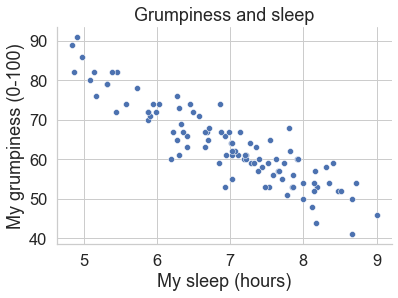

In [3]:
from myst_nb import glue
import seaborn as sns
sns.set_context("notebook", font_scale=1.5)
ax = sns.scatterplot(data = df,
                x = 'dan_sleep', 
                y = 'dan_grump')
ax.set(title = 'Grumpiness and sleep', ylabel = 'My grumpiness (0-100)', xlabel='My sleep (hours)')
sns.despine()

glue("sleepycorrelation_fig", ax, display=False)

 ```{glue:figure} sleepycorrelation-fig
:figwidth: 600px
:name: fig-sleepycorrelation

Scatterplot showing grumpiness as a function of hours slept.

```


The actual scatterplot that we draw is the one shown in {numref}`fig-sleepycorrelation`, and as we saw previously this corresponds to a correlation of $r=-.90$, but what we find ourselves secretly imagining is something that looks closer to the left panel in {numref}`fig-sleep_regressions_1`. That is, we mentally draw a straight line through the middle of the data. In statistics, this line that we're drawing is called a **_regression line_**. Notice that -- since we're not idiots -- the regression line goes through the middle of the data. We don't find ourselves imagining anything like the rather silly plot shown in the right panel in {numref}`fig-sleep_regressions_1`. 

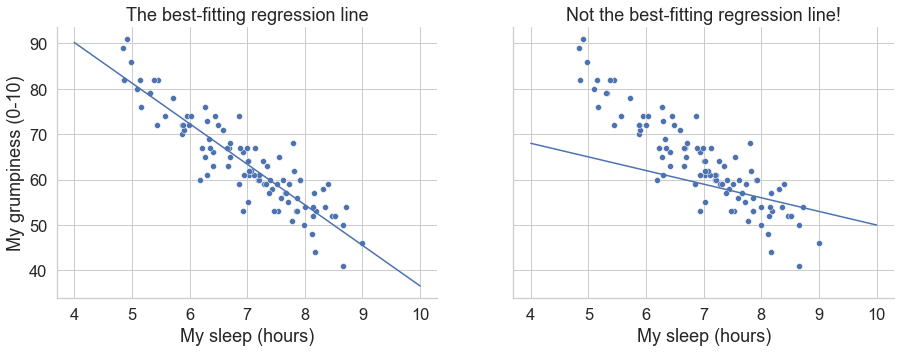

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# find the regression coefficients to allow manually plotting the line
model = smf.ols(formula="dan_grump ~ dan_sleep", data=df).fit()
intercept = model.params.Intercept
slope = model.params.dan_sleep


fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

x = np.linspace(4,10)


sns.scatterplot(data = df, x = 'dan_sleep', y = 'dan_grump', ax = axes[0])
fig.axes[0].set_title("The best-fitting regression line")
fig.axes[0].set_xlabel("My sleep (hours)")
fig.axes[0].set_ylabel("My grumpiness (0-10)")
fig.axes[0].plot(x,slope*x+intercept)

sns.scatterplot(data = df, x = 'dan_sleep', y = 'dan_grump', ax = axes[1])
fig.axes[1].set_title("Not the best-fitting regression line!")
fig.axes[1].set_xlabel("My sleep (hours)")
fig.axes[1].set_ylabel("My grumpiness (0-10)")
fig.axes[1].plot(x,-3*x+80)

sns.despine()

#glue("sleep_regressions_1-fig", fig, display=False)

 ```{glue:figure} sleep_regressions_1-fig
:figwidth: 600px
:name: fig-sleep_regressions_1

The panel to the left shows the sleep-grumpiness scatterplot from {numref}`fig-sleepycorrelation` with the best fitting regression line drawn over the top. Not surprisingly, the line goes through the middle of the data. In contrast, the panel to the right shows the same data, but with a very poor choice of regression line drawn over the top.

```


This is not highly surprising: the line that I've drawn in panel to the right doesn't "fit" the data very well, so it doesn't make a lot of sense to propose it as a way of summarising the data, right? This is a very simple observation to make, but it turns out to be very powerful when we start trying to wrap just a little bit of maths around it. To do so, let's start with a refresher of some high school maths. The formula for a straight line is usually written like this:

$$
y = mx + c
$$ 


Or, at least, that's what it was when I went to high school all those years ago. The two *variables* are $x$ and $y$, and we have two *coefficients*, $m$ and $c$. The coefficient $m$ represents the *slope* of the line, and the coefficient $c$ represents the *$y$-intercept* of the line. Digging further back into our decaying memories of high school (sorry, for some of us high school was a long time ago), we remember that the intercept is interpreted as "the value of $y$ that you get when $x=0$". Similarly, a slope of $m$ means that if you increase the $x$-value by 1 unit, then the $y$-value goes up by $m$ units; a negative slope means that the $y$-value would go down rather than up. Ah yes, it's all coming back to me now. 

Now that we've remembered that, it should come as no surprise to discover that we use the exact same formula to describe a regression line. If $Y$ is the outcome variable (the DV) and $X$ is the predictor variable (the IV), then the formula that describes our regression is written like this:

$$
\hat{Y_i} = b_1 X_i + b_0
$$

Hm. Looks like the same formula, but there's some extra frilly bits in this version. Let's make sure we understand them. Firstly, notice that I've written $X_i$ and $Y_i$ rather than just plain old $X$ and $Y$. This is because we want to remember that we're dealing with actual data. In this equation, $X_i$ is the value of predictor variable for the $i$th observation (i.e., the number of hours of sleep that I got on day $i$ of my little study), and $Y_i$ is the corresponding value of the outcome variable (i.e., my grumpiness on that day). And although I haven't said so explicitly in the equation, what we're assuming is that this formula works for all observations in the data set (i.e., for all $i$). Secondly, notice that I wrote $\hat{Y}_i$ and not $Y_i$. This is because we want to make the distinction between the *actual data* $Y_i$, and the *estimate* $\hat{Y}_i$ (i.e., the prediction that our regression line is making). Thirdly, I changed the letters used to describe the coefficients from $m$ and $c$ to $b_1$ and $b_0$. That's just the way that statisticians like to refer to the coefficients in a regression model. I've no idea why they chose $b$, but that's what they did. In any case $b_0$ always refers to the intercept term, and $b_1$ refers to the slope.


Excellent, excellent. Next, I can't help but notice that -- regardless of whether we're talking about the good regression line or the bad one -- the data don't fall perfectly on the line. Or, to say it another way, the data $Y_i$ are not identical to the predictions of the regression model $\hat{Y_i}$. Since statisticians love to attach letters, names and numbers to everything, let's refer to the difference between the model prediction and that actual data point as a *residual*, and we'll refer to it as $\epsilon_i$.[^noteepsilon] Written using mathematics, the residuals are defined as:

$$
\epsilon_i = Y_i - \hat{Y}_i
$$

which in turn means that we can write down the complete linear regression model as:

$$
Y_i = b_1 X_i + b_0 + \epsilon_i
$$

[^noteepsilon]: The $\epsilon$ symbol is the Greek letter epsilon. It's traditional to use $\epsilon_i$ or $e_i$ to denote a residual.

(regressionestimation)=
## Estimating a linear regression model


Okay, now let's redraw our pictures, but this time I'll add some lines to show the size of the residual for all observations. When the regression line is good, our residuals (the lengths of the solid black lines) all look pretty small, as shown in the left panel of {numref}`fig-sleep_regressions_2`, but when the regression line is a bad one, the residuals are a lot larger, as you can see from looking at the right panel of {numref}`fig-sleep_regressions_2`. Hm. Maybe what we "want" in a regression model is *small* residuals. Yes, that does seem to make sense. In fact, I think I'll go so far as to say that the "best fitting" regression line is the one that has the smallest residuals. Or, better yet, since statisticians seem to like to take squares of everything why not say that ...

> The estimated regression coefficients, $\hat{b}_0$ and $\hat{b}_1$ are those that minimise the sum of the squared residuals, which we could either write as $\sum_i (Y_i - \hat{Y}_i)^2$ or as $\sum_i {\epsilon_i}^2$.

Yes, yes that sounds even better. And since I've indented it like that, it probably means that this is the right answer. And since this is the right answer, it's probably worth making a note of the fact that our regression coefficients are *estimates* (we're trying to guess the parameters that describe a population!), which is why I've added the little hats, so that we get $\hat{b}_0$ and $\hat{b}_1$ rather than $b_0$ and $b_1$. Finally, I should also note that -- since there's actually more than one way to estimate a regression model -- the more technical name for this estimation process is **_ordinary least squares (OLS) regression_**.  

At this point, we now have a concrete definition for what counts as our "best" choice of regression coefficients, $\hat{b}_0$ and $\hat{b}_1$. The natural question to ask next is,  if our optimal regression coefficients are those that minimise the sum squared residuals, how do we *find* these wonderful numbers? The actual answer to this question is complicated, and it doesn't help you understand the logic of regression.[^notekungfu] As a result, this time I'm going to let you off the hook. Instead of showing you how to do it the long and tedious way first, and then "revealing" the wonderful shortcut that Python provides you with, let's cut straight to the chase... and use Python to do all the heavy lifting. 


[^notekungfu]: Or at least, I'm assuming that it doesn't help most people. But on the off chance that someone reading this is a proper kung fu master of linear algebra (and to be fair, I always have a few of these people in my intro stats class), it *will* help *you* to know that the solution to the estimation problem turns out to be $\hat{b} = (X^TX)^{-1} X^T y$, where $\hat{b}$ is a vector containing the estimated regression coefficients,  $X$ is the "design matrix" that contains the predictor variables (plus an additional column containing all ones; strictly $X$ is a matrix of the regressors, but I haven't discussed the distinction yet), and $y$ is a vector containing the outcome variable. For everyone else, this isn't exactly helpful, and can be downright scary. However, since quite a few things in linear regression can be written in linear algebra terms, you'll see a bunch of footnotes like this one in this chapter. If you can follow the maths in them, great. If not, ignore it.

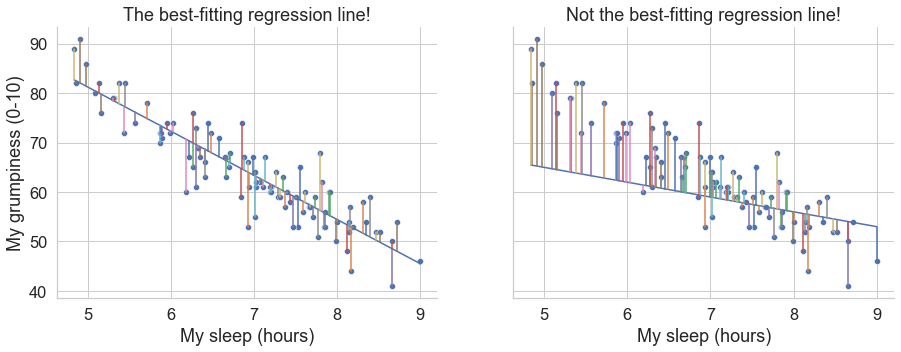

In [5]:
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

xData = df['dan_sleep']
yData = numpy.array(df['dan_grump'])

# (the solution to this figure stolen shamelessly from this stack-overflow answer by James Phillips:
# https://stackoverflow.com/questions/53779773/python-linear-regression-best-fit-line-with-residuals)

# fit linear regression model and save parameters
def func(x, a, b):
    return a * x + b

initialParameters = numpy.array([1.0, 1.0])

fittedParameters, pcov = curve_fit(func, xData, yData, initialParameters)

modelPredictions = func(xData, *fittedParameters) 

data = pd.DataFrame({'x': xData,
                     'y': yData})

# plot data points
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.scatterplot(data = data, x = 'x', y = 'y', ax = axes[0])
fig.axes[0].set_title("The best-fitting regression line!")
fig.axes[0].set_xlabel("My sleep (hours)")
fig.axes[0].set_ylabel("My grumpiness (0-10)")

# add regression line
xModel = numpy.linspace(min(xData), max(xData))
yModel = func(xModel, *fittedParameters)

axes[0].plot(xModel, yModel)

# add drop lines
for i in range(len(xData)):
    lineXdata = (xData[i], xData[i]) # same X
    lineYdata = (yData[i], modelPredictions[i]) # different Y
    axes[0].plot(lineXdata, lineYdata)

    
#####

# create poor-fitting model
badParameters = np.array([-3, 80])
badPredictions = func(xData, *badParameters) 

bad_xModel = numpy.linspace(min(xData), max(xData))
bad_yModel = func(bad_xModel, *badParameters)

# plot data with poor-fitting model
sns.scatterplot(data = data, x = 'x', y = 'y', ax = axes[1])
fig.axes[1].set_title("Not the best-fitting regression line!")
fig.axes[1].set_xlabel("My sleep (hours)")
fig.axes[1].set_ylabel("My grumpiness (0-10)")
fig.axes[1].plot(bad_xModel, bad_yModel)  

# add drop lines
for i in range(len(xData)):
    lineXdata = (xData[i], xData[i]) 
    lineYdata = (yData[i], badPredictions[i]) 
    axes[1].plot(lineXdata, lineYdata)
  
    
sns.despine()

 ```{glue:figure} sleep_regressions_2-fig
:figwidth: 600px
:name: fig-sleep_regressions_2

A depiction of the residuals associated with the best fitting regression line (left panel), and the residuals associated with a poor regression line (right panel). The residuals are much smaller for the good regression line. Again, this is no surprise given that the good line is the one that goes right through the middle of the data.

```

(pingouinregression)=
## Linear Regression with Python

As always, there are several different ways we could go about calculating a linear regression in Python, but we'll stick with `pingouin`, which for my money is one of the simplest and easiest packages to use. The `pingouin` command for linear regression is, well, `linear_regression`, so that couldn't be much more straightforward. After that, we just need to tell `pinguoin` which variable we want to use as a predictor variable (independent variable), and which one we want to use as the outcome variable (dependent variable). `pingouin` wants the predictor variable first, so, since we want to model my grumpiness as a function of my sleep, we write:

In [6]:
import pingouin as pg

lm = pg.linear_regression(df['dan_sleep'], df['dan_grump'])

In [7]:
# Display results, rounded to two decimal places.
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,125.96,3.02,41.76,0.0,0.82,0.81,119.97,131.94
1,dan_sleep,-8.94,0.43,-20.85,0.0,0.82,0.81,-9.79,-8.09


As is its way, `pingouin` gives us a nice simple table, with a lot of information. Most importantly for now, we can see that `pingouin` has caclulated the intercept $\hat{b}_0 = 125.96$ and the slope $\hat{b}_1 = -8.94$. In other words, the best-fitting regression line that I plotted in {numref}`fig-sleep_regressions_1` has this formula: 

$$
\hat{Y}_i = -8.94 \ X_i + 125.96
$$ 

### Warning!!!

Remember, it's critical that you put the variables in the right order. If you reverse the predictor and outcome variables, `pinguoin` will happily calculate a result for you, but it will not be the one you are looking for. If instead, we had written `pg.linear_regression(df['dan_grump'], df['dan_sleep'])`, we would get the following:

In [8]:
lm = pg.linear_regression(df['dan_grump'], df['dan_sleep'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,12.78,0.28,45.27,0.0,0.82,0.81,12.22,13.34
1,dan_grump,-0.09,0.00,-20.85,0.0,0.82,0.81,-0.10,-0.08


The output looks valid enough on the face of it, and it is even statistically significant. But in this model, we just predicted my son's sleepiness as a function of my grumpiness, which is madness! Reversing the direction of causality would make a great scifi movie[^noteNolan], but it's no good in statistics. So remember, predictor first, outcome second[^noteformula]

[^noteNolan]: Christopher Nolan, have your people call my people if you're interested, we'll do lunch!
[^noteformula]: This is extra confusing if you happen to have come from the world of R, where this sort of model is usually defined with a formula, in which the outcome measure comes first, followed by the predictor(s), or even if you have used `statsmodels`, which also preserves the R-style formula notation.

### Interpreting the estimated model

The most important thing to be able to understand is how to interpret these coefficients. Let's start with $\hat{b}_1$, the slope. If we remember the definition of the slope, a regression coefficient of $\hat{b}_1 = -8.94$ means that if I increase $X_i$ by 1, then I'm decreasing $Y_i$ by 8.94. That is, each additional hour of sleep that I gain will improve my mood, reducing my grumpiness by 8.94 grumpiness points. What about the intercept? Well, since $\hat{b}_0$ corresponds to "the expected value of $Y_i$ when $X_i$ equals 0", it's pretty straightforward. It implies that if I get zero hours of sleep ($X_i =0$) then my grumpiness will go off the scale, to an insane value of ($Y_i = 125.96$). Best to be avoided, I think.


(multipleregression)=
## Multiple linear regression

The simple linear regression model that we've discussed up to this point assumes that there's a single predictor variable that you're interested in, in this case `dan_sleep`. In fact, up to this point, *every* statistical tool that we've talked about has assumed that your analysis uses one predictor variable and one outcome variable. However, in many (perhaps most) research projects you actually have multiple predictors that you want to examine. If so, it would be nice to be able to extend the linear regression framework to be able to include multiple predictors. Perhaps some kind of **_multiple regression_** model would be in order?

Multiple regression is conceptually very simple. All we do is add more terms to our regression equation. Let's suppose that we've got two variables that we're interested in; perhaps we want to use both `dan_sleep` and `baby_sleep` to predict the `dan_grump` variable. As before, we let $Y_i$ refer to my grumpiness on the $i$-th day. But now we have two $X$ variables: the first corresponding to the amount of sleep I got and the second corresponding to the amount of sleep my son got. So we'll let $X_{i1}$ refer to the hours I slept on the $i$-th day, and $X_{i2}$ refers to the hours that the baby slept on that day. If so, then we can write our regression model like this:

$$
Y_i = b_2 X_{i2} + b_1 X_{i1} + b_0 + \epsilon_i
$$

As before, $\epsilon_i$ is the residual associated with the $i$-th observation, $\epsilon_i = {Y}_i - \hat{Y}_i$. In this model, we now have three coefficients that need to be estimated: $b_0$ is the intercept, $b_1$ is the coefficient associated with my sleep, and $b_2$ is the coefficient associated with my son's sleep. However, although the number of coefficients that need to be estimated has changed, the basic idea of how the estimation works is unchanged: our estimated coefficients $\hat{b}_0$, $\hat{b}_1$ and $\hat{b}_2$ are those that minimise the sum squared residuals. 

(pingouinmultiplelinearregression)=
## Multiple Linear Regression in Python

Doing mulitiple linear regression in `pingouin` is just as easy as adding some more predictor variables, like this:

In [9]:
 lm = pg.linear_regression(df[['dan_sleep', 'baby_sleep']], df['dan_grump'])

Still, there is one thing to watch out for. If you look carefully at the command above, you will notice that not only have we added a new predictor (`baby_sleep`), we have also added some extra brackets. While before our predictor variable was `['dan_sleep']`, now we have `[['dan_sleep', 'baby_sleep']]`. Why the extra set of `[]`?

This is because we are using the brackets in two different ways. When we wrote `['dan_sleep']`, the square brackets mean "select the column with the header 'dan_sleep'". But now we are giving `pingouin` a _list_ of columns to select, and `list` objects are _also_ defined by square brackets in Python. To keep things clear, another way to achieve the same result would be to define the list of predictor variables outside the call to `pingouin`:

In [10]:
predictors = ['dan_sleep', 'baby_sleep']
outcome = 'dan_grump'

lm = pg.linear_regression(df[predictors], df[outcome])

You could do all the work outside of `pinguoin`, like this:

In [11]:
predictors = df[['dan_sleep', 'baby_sleep']]
outcome = df['dan_grump']

lm = pg.linear_regression(predictors, outcome)

All three of these will give the same result, so it's up to you choose what makes most sense to you. But now it's time to take a look at the results:

In [12]:
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,125.97,3.04,41.42,0.00,0.82,0.81,119.93,132.00
1,dan_sleep,-8.95,0.55,-16.17,0.00,0.82,0.81,-10.05,-7.85
2,baby_sleep,0.01,0.27,0.04,0.97,0.82,0.81,-0.53,0.55


The coefficient associated with dan_sleep is quite large, suggesting that every hour of sleep I lose makes me a lot grumpier. However, the coefficient for baby_sleep is very small, suggesting that it doesn’t really matter how much sleep my son gets; not really. What matters as far as my grumpiness goes is how much sleep I get. To get a sense of what this multiple regression model looks like, XXXXXXXXXXXXX shows a 3D plot that plots all three variables, along with the regression model itself.

In [37]:
coefs

[-8.950249731788173, 0.010524471189270912]

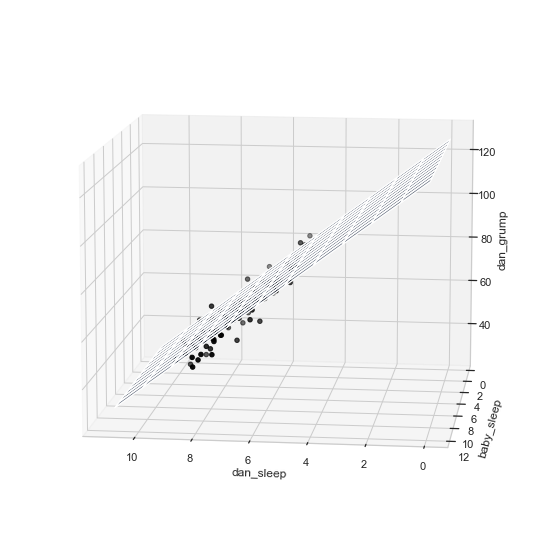

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D



sns.set(style = 'whitegrid')

fig = plt.figure(figsize=(25, 10)) 
ax = fig.add_subplot(111, projection = '3d')


x = df['dan_sleep']
y = df['baby_sleep']
z = df['dan_grump']

ax.set_xlabel("dan_sleep")
ax.set_ylabel("baby_sleep")
ax.set_zlabel("dan_grump")

#ax.plot_surface(xx, yy, z, alpha=0.2)

coefs = list(lm['coef'][1:])
intercept = lm['coef'][0]
xs = np.tile(np.arange(12), (12,1))
ys = np.tile(np.arange(12), (12,1)).T
zs = xs*coefs[0]+ys*coefs[1]+intercept
ax.plot_surface(xs,ys,zs, alpha=0.5)

ax.plot_surface(xs,ys,zs, alpha=0.01)
ax.scatter(x, y, z, color = 'black')

ax.view_init(11,97)


plt.show()



 ```{glue:figure} sleep_regressions_3d-fig
:figwidth: 600px
:name: fig-sleep_regressions_3d

A 3D visualisation of a multiple regression model. There are two predictors in the model, `dan_sleep` and `baby_sleep`; the outcome variable is `dan.grump`. Together, these three variables form a 3D space: each observation (blue dots) is a point in this space. In much the same way that a simple linear regression model forms a line in 2D space, this multiple regression model forms a plane in 3D space. When we estimate the regression coefficients, what we're trying to do is find a plane that is as close to all the blue dots as possible."

```